In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, KFold  # Splitting data
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
data = pd.read_csv('/Users/merkava/Documents/School/SE/Amazon-Product- Review.csv')
data.dropna(inplace=True)

print(data.shape)
print(f"Dataset shape: {data.shape}")



(30840, 16)
Dataset shape: (30840, 16)


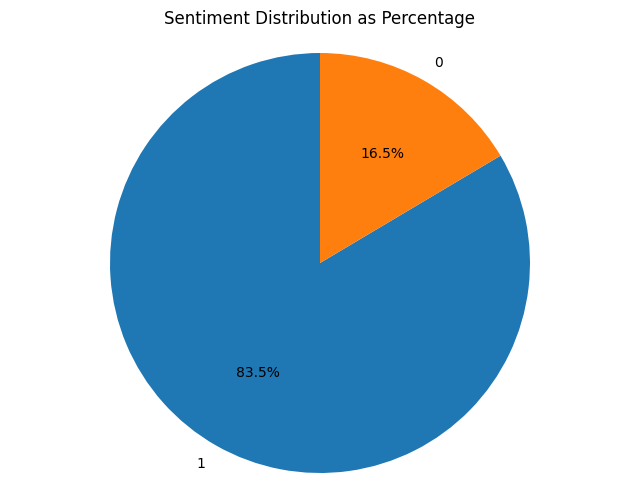

In [32]:
balance = data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(balance, labels=balance.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution as Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Function to clean review text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    return text



In [35]:
# Apply preprocessing to the reviewDescription column
data['cleaned_review'] = data['review_body'].apply(preprocess_text)

# Extract features and target variables
X = data['cleaned_review']
y = data['sentiment']  # Sentiment column contains 1 (positive) and 0 (negative)

# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 words

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Now you can proceed to train your model using the resampled data

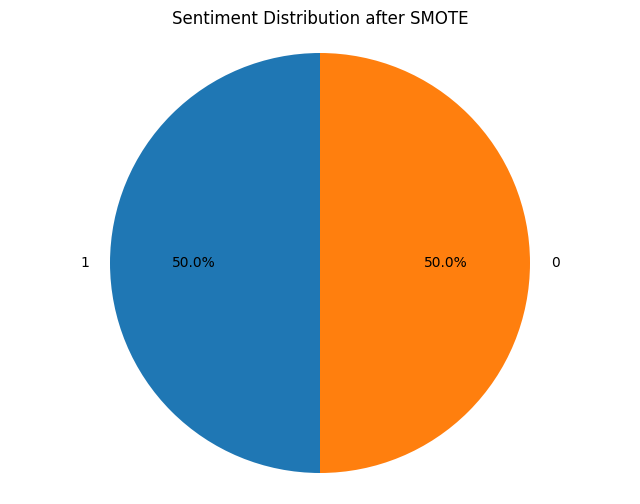

In [36]:
# Visualize the class distribution in the resampled data
balance = pd.Series(y_train_smote).value_counts()
plt.figure(figsize=(8, 6))
plt.pie(balance, labels=balance.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution after SMOTE')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()